In [1]:
# import libraries 

from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib



In [2]:
# Connect to Website and pull in data

URL = 'https://www.amazon.com/s?k=playstation+4&ref=nb_sb_noss_2'


HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Connection": "keep-alive",
    "DNT": "1",  # Do Not Track
    "Upgrade-Insecure-Requests": "1",
    "Referer": "https://www.google.com/"
}

# HTTP Request
webpage = requests.get(URL, headers=HEADERS)
print(webpage.status_code)




200


In [3]:
webpage.content

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [4]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [5]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':"a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"})
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Sony-Playstation-PS4-Black-Console/dp/B012CZ41ZA/ref=sr_1_1?dib=eyJ2IjoiMSJ9.lV80Ooj_H7xjfiHhn1_uHnyJAbUUCxvgOaxNXDhvpdwiMy5i3ImNmuSP9SOmr3zXNTEMxVo_haqWHA8Puo7aK7glSonpH_1kbckNi6SuZ2_-SJxp4Xej_FeLuswYOvkchKgbO4D0DktcidQmSW3Wc-rbpBFsnL71Oi6jEcO4osP2KnrfEySlyumxnt91_TW_QwtPFOi1xznSGX6VipTGADWH4aqfZ_p3HcTvWiSqm0E.p9O92ov1FeUngR7i3t8LbEQkpQzbIrmlFhho3JXnyys&amp;dib_tag=se&amp;keywords=playstation+4&amp;qid=1731156436&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">Sony Playstation PS4 1TB Black Console</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Playstation-500GB-System-CUH-2215AB01-3003347/dp/B07JMNNPXC/ref=sr_1_2?dib=eyJ2IjoiMSJ9.lV80Ooj_H7xjfiHhn1_uHnyJAbUUCxvgOaxNXDhvpdwiMy5i3ImNmuSP9SOmr3zXNTEMxVo_haqWHA8Puo7aK7glSonpH_1kbckNi6SuZ2_-SJxp4Xej_FeLuswYOvkchKgbO4D0DktcidQmSW3Wc-rbpBFsnL71Oi6jEcO4osP2KnrfE

In [6]:
link = links[0].get('href')
link


'/Sony-Playstation-PS4-Black-Console/dp/B012CZ41ZA/ref=sr_1_1?dib=eyJ2IjoiMSJ9.lV80Ooj_H7xjfiHhn1_uHnyJAbUUCxvgOaxNXDhvpdwiMy5i3ImNmuSP9SOmr3zXNTEMxVo_haqWHA8Puo7aK7glSonpH_1kbckNi6SuZ2_-SJxp4Xej_FeLuswYOvkchKgbO4D0DktcidQmSW3Wc-rbpBFsnL71Oi6jEcO4osP2KnrfEySlyumxnt91_TW_QwtPFOi1xznSGX6VipTGADWH4aqfZ_p3HcTvWiSqm0E.p9O92ov1FeUngR7i3t8LbEQkpQzbIrmlFhho3JXnyys&dib_tag=se&keywords=playstation+4&qid=1731156436&sr=8-1'

In [7]:
product_list = "https://amazon.com" + link
product_list

'https://amazon.com/Sony-Playstation-PS4-Black-Console/dp/B012CZ41ZA/ref=sr_1_1?dib=eyJ2IjoiMSJ9.lV80Ooj_H7xjfiHhn1_uHnyJAbUUCxvgOaxNXDhvpdwiMy5i3ImNmuSP9SOmr3zXNTEMxVo_haqWHA8Puo7aK7glSonpH_1kbckNi6SuZ2_-SJxp4Xej_FeLuswYOvkchKgbO4D0DktcidQmSW3Wc-rbpBFsnL71Oi6jEcO4osP2KnrfEySlyumxnt91_TW_QwtPFOi1xznSGX6VipTGADWH4aqfZ_p3HcTvWiSqm0E.p9O92ov1FeUngR7i3t8LbEQkpQzbIrmlFhho3JXnyys&dib_tag=se&keywords=playstation+4&qid=1731156436&sr=8-1'

In [8]:
new_webpage = requests.get(product_list, headers=HEADERS)
new_webpage

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
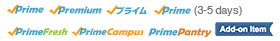

In [9]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")
new_soup

In [10]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'Sony Playstation PS4 1TB Black Console'

In [11]:
new_soup.find(id="acrCustomerReviewText").text.strip()

'1,554 ratings'

In [12]:
new_soup.find("span", attrs={"class":'a-icon-alt'}).text

'4.7 out of 5 stars'